# Density Estimation using GPy

Using survey data from NaCRRI for 2014 for CMD

In [49]:
%matplotlib inline
import numpy as np
import pandas as pd
import GPy
import matplotlib.pyplot as plt
import seaborn as sns

#input file with all points in uganda
filename = 'PointsInUganda15976.csv'
datadf=pd.read_csv(filename)
testdata=datadf[['lon','lat']].as_matrix()

In [6]:
testdata[:5]

array([[ 29.59024236,  -0.99879351],
       [ 29.59024236,  -1.03379351],
       [ 29.59024236,  -1.06879351],
       [ 29.59024236,  -1.10379351],
       [ 29.59024236,  -1.13879351]])

Train Density Estimator from historical survey data

In [7]:
#Load historical set
surveydata ='2014_Data/2014_CMD_Data.csv'
traindatadf= pd.read_csv(surveydata)
traindatadf.head()

,District,Variety_Sampled,Age,Field_Size(M2),Neighbor_fields,lat,lon,Altitude,CMD_Severity,CMD_Incidence,AdultPopulation,Mean_adult_whitefly_per_Plant
0,Napak,Nase 14,4.0,1200,0,2.36880,34.38091,1202.0,0.0,0.0,67,2.2
1,Napak,Nase 13,5.0,600,3,2.34449,34.07118,1179.0,0.0,0.0,0,0.0
2,Napak,TME 14,5.0,4000,2,2.30888,34.33370,1176.0,0.0,0.0,9,0.3
3,Napak,Nase 14,5.0,2000,4,2.20295,34.24365,1162.0,0.0,0.0,161,5.4
4,Napak,TME 14,5.0,8000,8,2.11081,34.23367,1226.0,0.0,0.0,23,0.8


In [8]:
traindatadf.describe()

,Age,lat,lon,Altitude,CMD_Severity,CMD_Incidence,AdultPopulation,Mean_adult_whitefly_per_Plant
count,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000
mean,4.738571,1.604397,32.447380,1122.673714,1.440000,17.113714,303.395238,10.112286
std,1.235975,1.072948,1.164057,170.639753,1.452456,27.263093,1081.713694,36.056982
min,2.000000,0.000650,29.759990,618.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,0.631042,31.522848,1055.250000,0.000000,0.000000,10.000000,0.300000
50%,5.000000,1.573620,32.531255,1105.000000,2.000000,3.300000,44.000000,1.500000
75%,6.000000,2.434565,33.481540,1187.750000,2.900000,23.300000,184.750000,6.150000
max,14.000000,3.819160,34.757770,1986.000000,5.000000,100.000000,18630.000000,621.000000


In [9]:
#I give X two inputs for Latitude & longitude, and Y the input set 
X=traindatadf[['lon','lat']].as_matrix()
Y=traindatadf['CMD_Incidence'].as_matrix()[:,None]
print X.shape, Y.shape

(1050, 2) (1050, 1)


Train GPy model 

In [11]:
#it iterates these number of times until it stops
max_iters=100

#Give the kernel 2 input dimensions 
input_dim=2
rbf = GPy.kern.RBF(input_dim)

# Instantiate model
m = GPy.models.GPRegression(X, Y, kernel=rbf)

# contrain all parameters to be positive (but not inducing inputs)
m.rbf.lengthscale = .0006333  #0.008333
m.checkgrad()

# optimize, run the model & set parameters
m.optimize('tnc', messages=1, max_iters=max_iters)

# plot
#m.plot()

Plot the resultant density. Levels ranges from 1 to 30. It defines how smooth the plot is (how many contours as well)

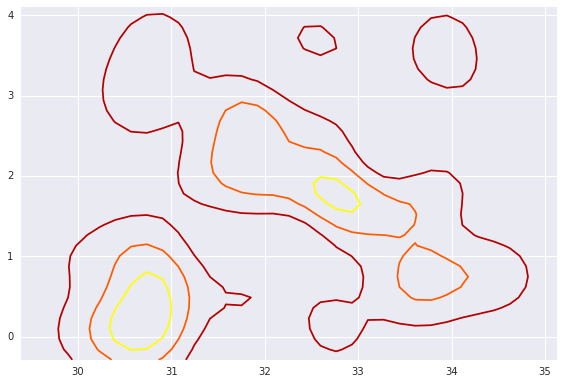

In [50]:
plt.figure(figsize=(12,10))
m.plot(plot_density=True, plot_data=False, levels=5)

Predict on all the points in the map of Uganda based on the trained model

In [28]:
#testing the model
meanx,var = m.predict(testdata)
ZZ = meanx
XX = testdata[:,0][:,None]
YY = testdata[:,1][:,None]

Plot the predicted values and the CMD density map

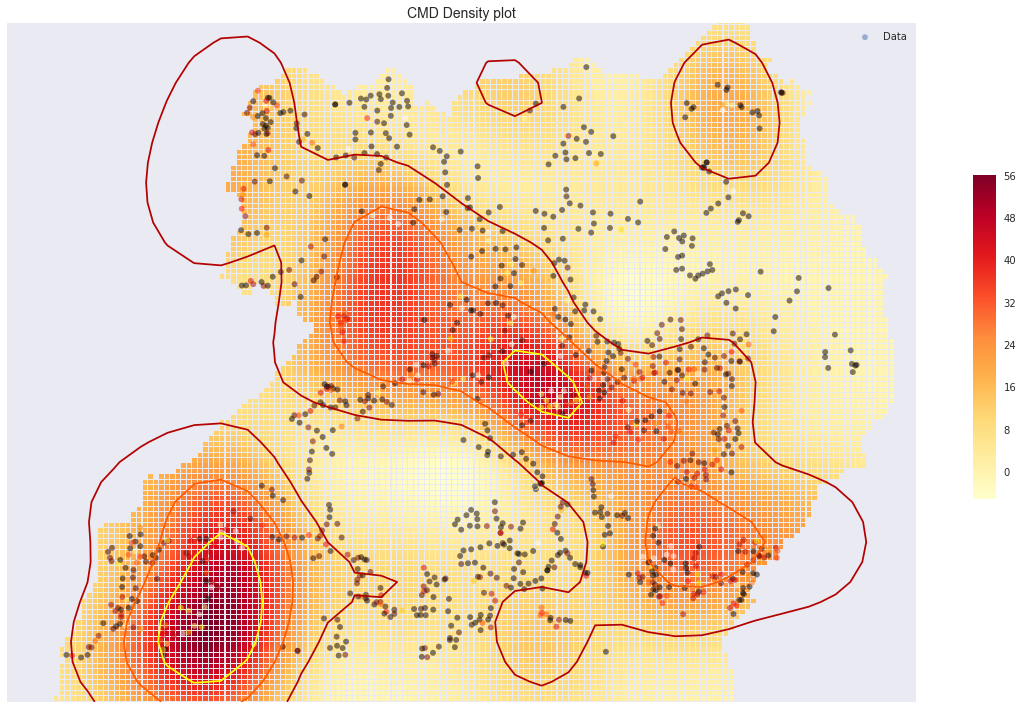

In [62]:
fig, ax = plt.subplots(nrows = 1, ncols = 1,figsize=(16,10), dpi=100)

im = ax.scatter(XX, YY, c = ZZ, cmap = plt.cm.YlOrRd, edgecolor = '',marker='s')
ax.set_xticks([])
ax.set_yticks([])
titlex ='CMD Density plot'
fontsize=14
ax.set_title(titlex, fontsize= fontsize)

fig.tight_layout()

fig.subplots_adjust(right = 0.80)
cbar_ax = fig.add_axes([0.85,0.3,0.02,0.45]) 
plt.colorbar(im, cmap =plt.cm.YlOrRd, cax = cbar_ax);

m.plot(ax=ax, levels=5)